# GRIP APRIL 2023 - The Sparks Foundation


## Data Science and Buisness Analytics Internship


### Author: Sushmita Kumari


### Task 4: Exploratory Data Analysis - Terrorism

● As a security/defense analyst, we will try to find out the hot zone of terrorism.

● We will try to derive all security issues and insights by performing EDA


### Dataset: https://bit.ly/2TK5Xn5


In [2]:
#importing useful libraries

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset

df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#no. of rows and columns in the dataset

df.shape

(181691, 135)

In [5]:
#list of columns in the dataset

df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
#renaming only useful columns for easier readability

df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'gname':'Group',
                     'country_txt':'Country','region_txt':'Region', 'provstate':'State', 'city':'City',
                     'latitude':'Latitude', 'longitude':'Longitude', 'summary':'Summary', 'attacktype1_txt':'Attacktype', 
                      'targtype1_txt':'TargetType', 'weaptype1_txt':'Weapon',
                     'nwound':'Wound', 'nkill':'Kill'}, inplace= True)

In [7]:
#updating the dataset with only useful columns

df = df [['Year', 'Month', 'Day', 'Country', 'State', 'Region','City',
                     'Latitude', 'Longitude', 'Attacktype', 'Kill','Wound', 'target1', 'Summary',
                      'Group', 'TargetType', 'Weapon', 'motive']]

In [8]:
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attacktype,Kill,Wound,target1,Summary,Group,TargetType,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
#checking number of missing values in each columns

df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
Attacktype         0
Kill           10313
Wound          16311
target1          636
Summary        66129
Group              0
TargetType         0
Weapon             0
motive        131130
dtype: int64

In [11]:
#entering '0' for all missing entries in columns "Wound" and "Kill"

df['Wound'] = df['Wound'].fillna(0)
df['Kill'] = df['Kill'].fillna(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   Latitude    177135 non-null  float64
 8   Longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  Kill        181691 non-null  float64
 11  Wound       181691 non-null  float64
 12  target1     181055 non-null  object 
 13  Summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  TargetType  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [13]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [14]:
#number of unique values in each column

for i in df.columns:
    print(i,df[i].nunique())

Year 47
Month 13
Day 32
Country 205
State 2855
Region 12
City 36674
Latitude 48322
Longitude 48039
Attacktype 9
Kill 205
Wound 238
target1 86006
Summary 112492
Group 3537
TargetType 22
Weapon 12
motive 14490


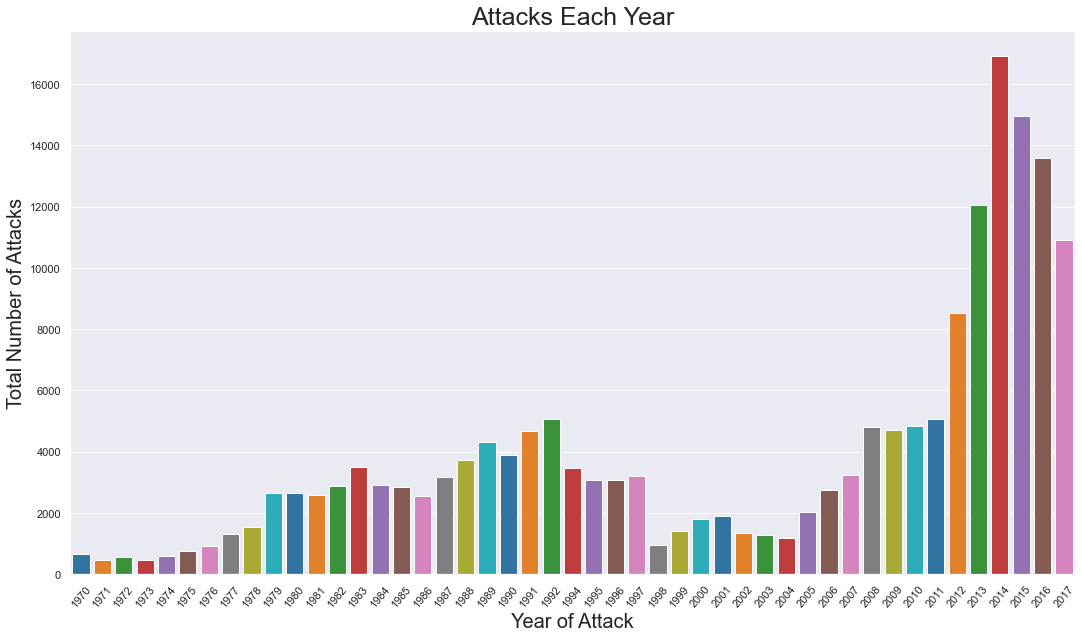

In [15]:
#finding the highest year of attack

year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Year of Attack', fontsize = 20)
plt.ylabel('Total Number of Attacks', fontsize = 20)
plt.title('Attacks Each Year', fontsize = 25)
plt.show()

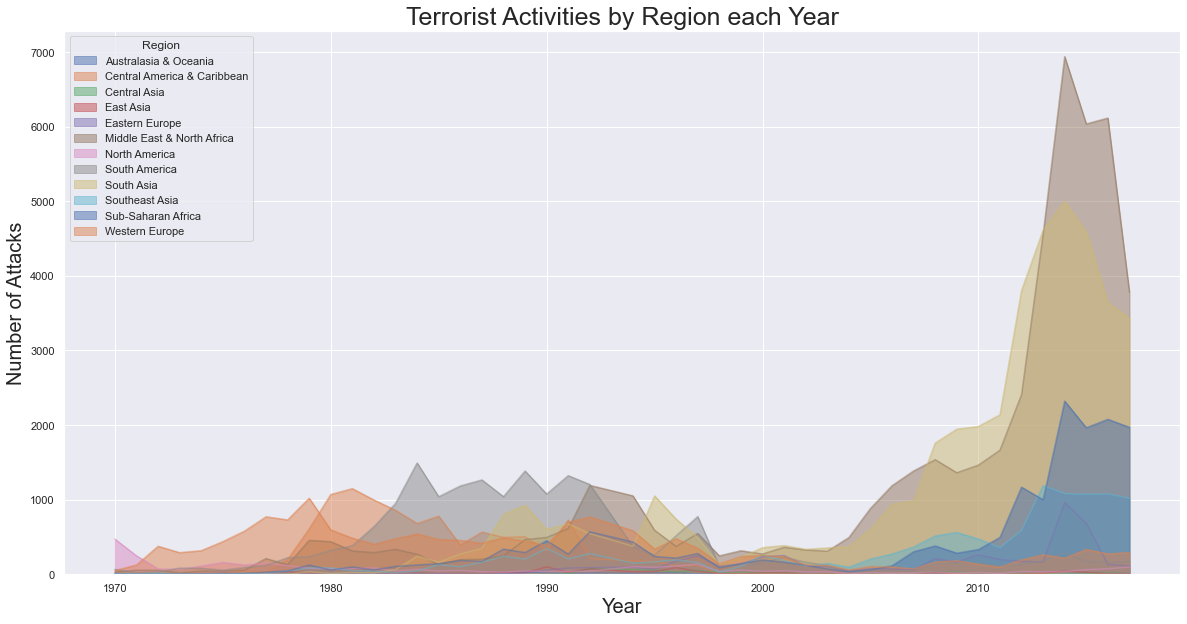

In [16]:
#terrorist activities by region each year

pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities by Region each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [48]:
#total number of attacks in top 10 countries

attack = df.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [49]:
#total number of attacks by top 10 terorist groups

df.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

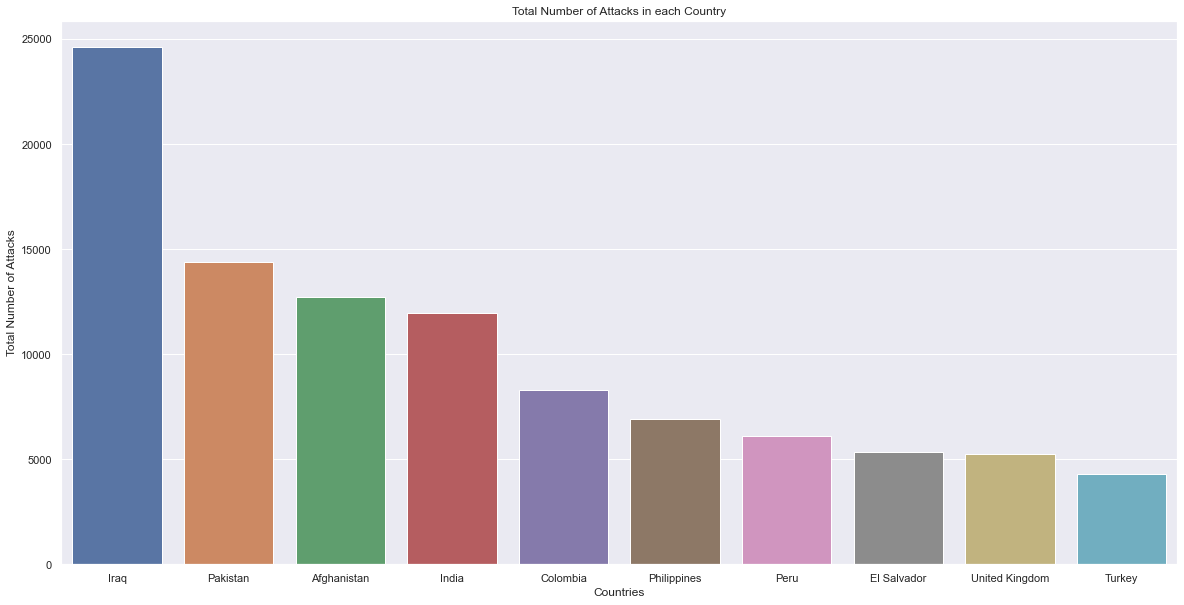

In [50]:
#finding total number of attacks in each country

plt.subplots(figsize = (20,10))
sns.barplot(x = df['Country'].value_counts()[:10].index, y = df['Country'].value_counts()[:10])
plt.title('Total Number of Attacks in each Country')
plt.xlabel('Countries')
plt.ylabel('Total Number of Attacks')
plt.xticks(rotation=0)
plt.show()

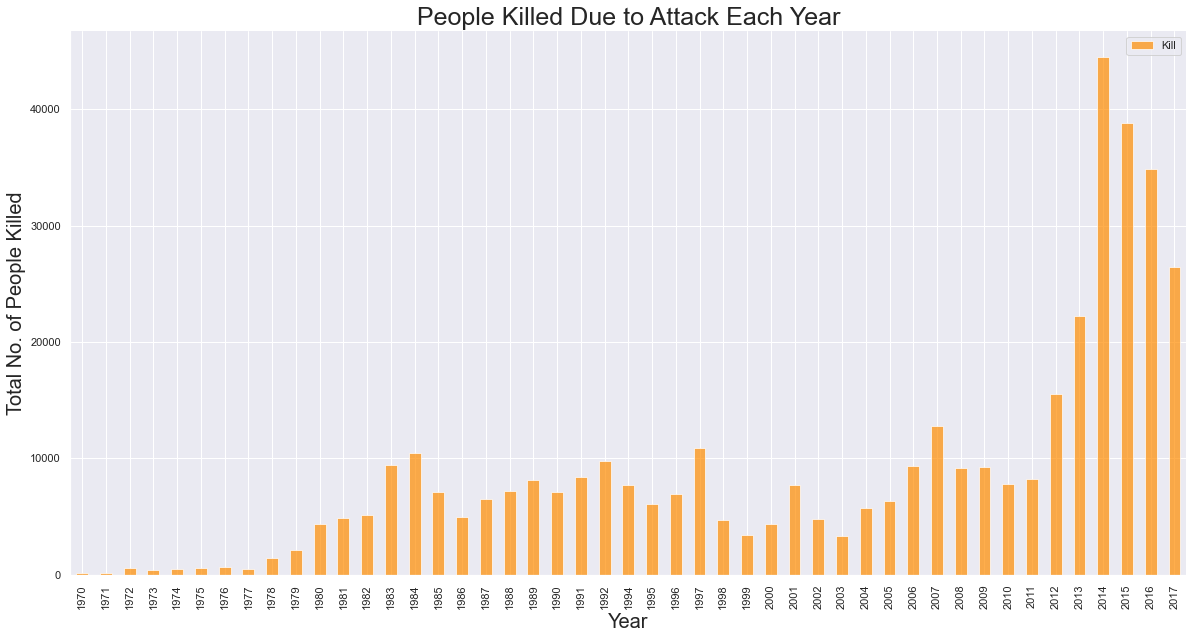

In [51]:
#finding total number of people killed due to attack each year

data = df[['Year','Kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
data.plot(kind='bar', alpha=0.7, ax=ax4, color='DarkOrange')
plt.xticks(rotation = 90)
plt.title('People Killed Due to Attack Each Year', fontsize = 25)
plt.ylabel('Total No. of People Killed', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines['right']
right_side.set_visible(False)

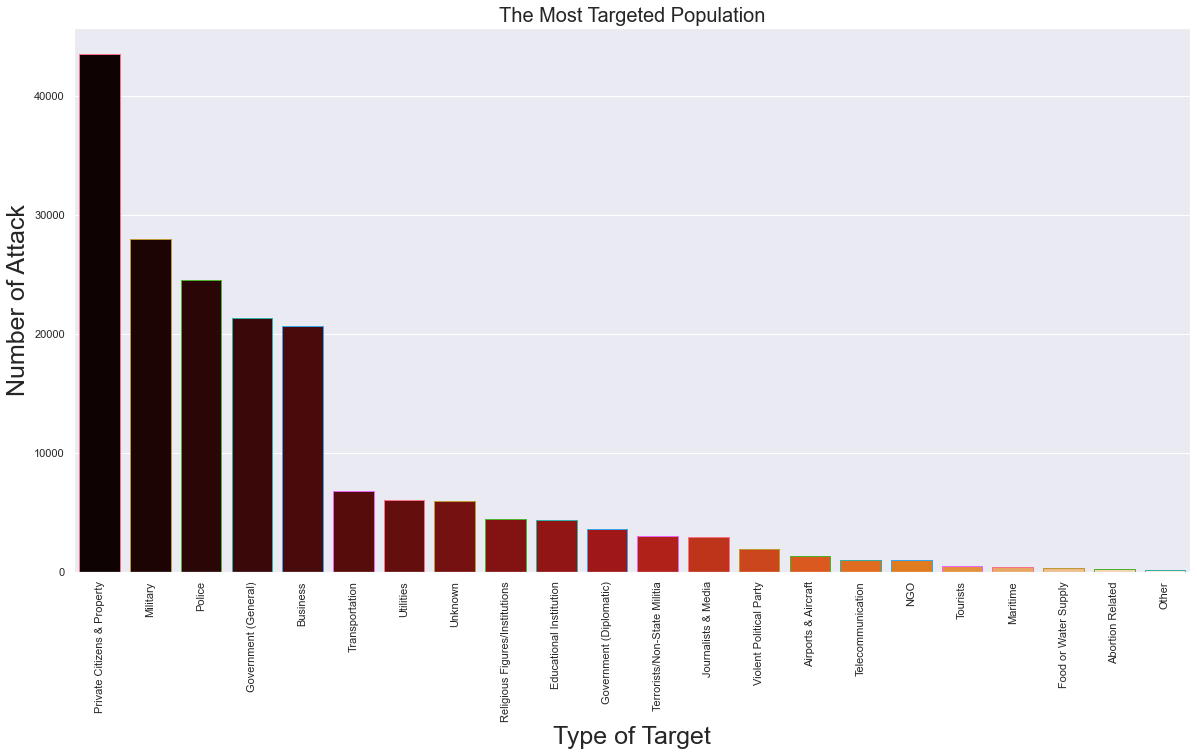

In [41]:
#finding the most targeted individual/ infrastructure

plt.subplots(figsize=(20,10))
sns.countplot(x = df['TargetType'], order=df['TargetType'].value_counts().index,
             palette = 'gist_heat', edgecolor=sns.color_palette("husl"))
plt.xlabel('Type of Target', fontsize = 25)
plt.ylabel('Number of Attack', fontsize = 25)
plt.xticks(rotation=90)
plt.title("The Most Targeted Population", fontsize=20)
plt.show()

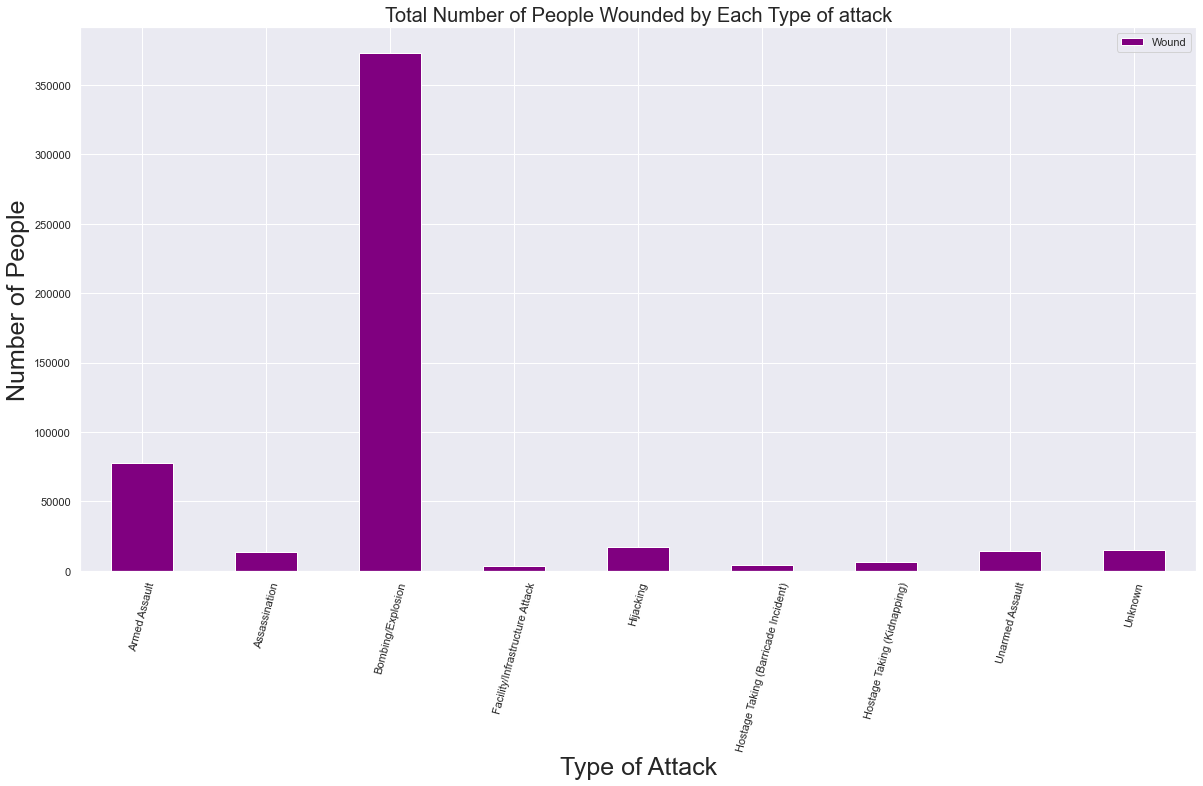

In [29]:
#finding total number of people wounded by each type of attack

df[['Attacktype', 'Wound']].groupby(["Attacktype"], axis = 0).sum().plot(kind='bar', figsize=(20,10),color=['Purple'])
plt.xlabel('Type of Attack', fontsize = 25)
plt.ylabel('Number of People', fontsize = 25)
plt.xticks(rotation=75)
plt.title("Total Number of People Wounded by Each Type of attack", fontsize=20)
plt.show()

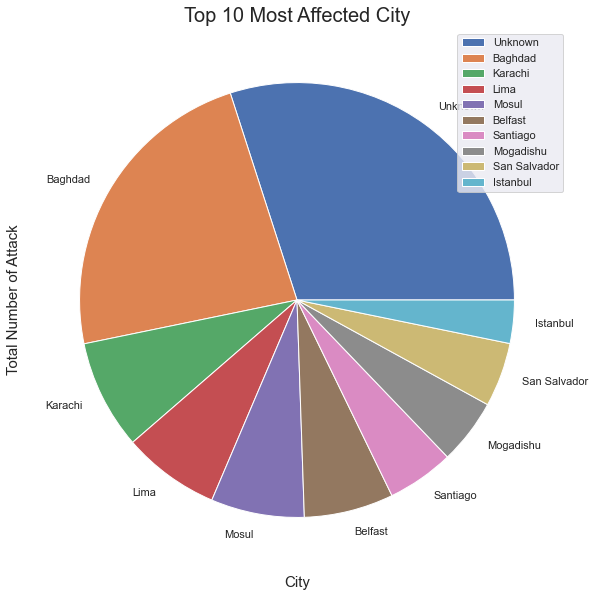

In [32]:
# finding top 10 cities affected by terrorism

df['City'].value_counts().to_frame().sort_values('City', axis = 0, ascending=False).head(10).plot(kind='pie', subplots=True,figsize=(20,10))

plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Number of Attack', fontsize = 15)
plt.xticks(rotation=50)
plt.title("Top 10 Most Affected City", fontsize=20)
plt.show()

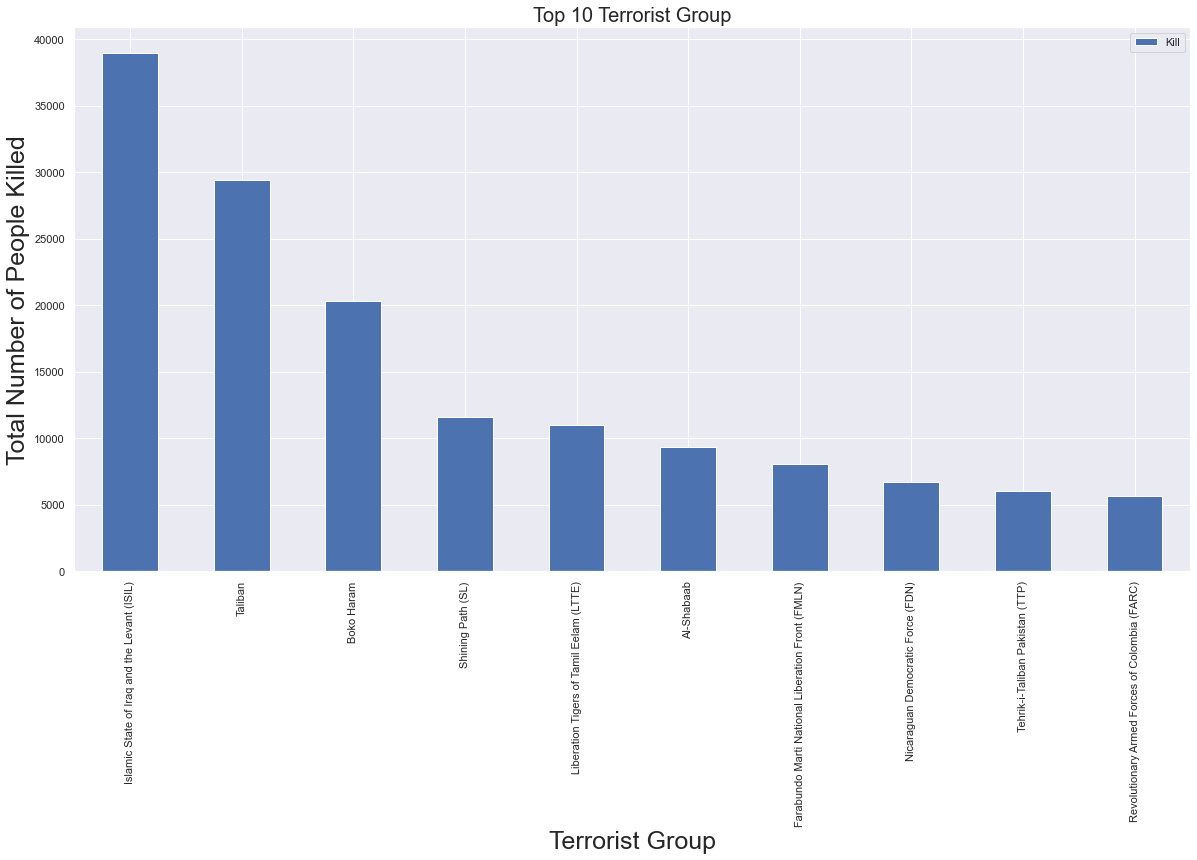

In [52]:
#finding top 10 terrorist groups on the basis of total number of kills

df[['Group','Kill']].groupby(['Group'], axis=0).sum().drop('Unknown').sort_values('Kill', ascending=False).head(10).plot(kind='bar', subplots=True,figsize=(20,10))
plt.xlabel('Terrorist Group', fontsize = 25)
plt.ylabel('Total Number of People Killed', fontsize = 25)
plt.xticks(rotation=90)
plt.title("Top 10 Terrorist Group", fontsize=20)
plt.show()

In [44]:
#finding top 10 terrorist groups on the basis of total number of kills

data = df[['Group','Country','Kill']]
data=data.groupby(['Group', 'Country'], axis = 0).sum().sort_values('Kill', ascending=False).drop('Unknown').reset_index().head(10)
data

,Group,Country,Kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [45]:
#total number of people who lost their lives due to terrorism

Kill = df.loc[:,"Kill"]
print('Total number of people killed due to terrorism:', int(sum(Kill.dropna())))

Total number of people killed due to terrorism: 411868


In [46]:
#total number of kills due to each type of attack

typekill = df.pivot_table(columns='Attacktype', values='Kill', aggfunc='sum')
typekill    

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [47]:
#total number of kills in each country

countrykill = df.pivot_table(columns='Country', values='Kill', aggfunc='sum')
countrykill    

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


# Conclusion:

Most targetes group of individuals/ infrastructure: Private Citizens and Property followed by Military, Police, Government and so on.

Country with the most attacks: Iraq

City with the most attacks: Baghdad

Region with the most attacks: Middle East and North Africa

Year with the most attacks: 2014

Group with the most kills: ISIL and Taliban

Most attack types: Bombing/ Explosion

# Inference:

Since Private Citizens and Property are being targeted consistently so stronger security and surveillance should be provided, especially in the dense populated regions.
More surveillance is required especially in the Middle East & North African Regions.
Strict border policy should be implemented to prevent the movement of explosives between the regions.